<a href="https://colab.research.google.com/github/AdrianDiazGaxiola/Proyecto-Final/blob/main/IPCC_Procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este código se empleará para limpiar los datos de los archivos IPCC de los años 1990 a 2019

In [ ]:
!pip install numpy pandas info_gain

Se importan las librerías a utilizar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from info_gain import info_gain

Aquí se leen los archivos con los datos en bruto y se guardan como dataframes en un diccionario, además se guardan en una lista los nombres de las columnas y se agregan a cada dataframe como los nombres de las columnas

In [ ]:
IPCC = {}
Enc = ["Categoría", "CO2", "CH4", "N2O", "HFC-23", "HFC-410A", "HFC-43-10-mee", "HFC-125", "HFC-134", "HFC-134a", "HFC-404A", "HFC-407C", "HFC-507a", "HFC-152a", "HFC-227ea", "HFC-236fa", "HFC-365mfc/227ea", "HFC-365mfc", "HFC-245fa", "HFC-32", "CF4", "C2F6", "C3F8", "C4F6", "c-C4F8", "C5F8", "NF3", "SF6", "EMISIONES NETAS", "EMISIONES (sin 3B Y 3D)", "", "Carbono negro"]

for i in range(1990,2020):
  url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/raw/main/Data/IPCC/IPCC_%d.csv" % i
  IPCC[i] = pd.read_csv(url, names = Enc, encoding = 'ISO-8859-1', na_filter=False, thousands=',')
  IPCC[i] = IPCC[i].drop(columns=['', 'EMISIONES (sin 3B Y 3D)'])


Se prueba que los archivos se leyeron correctamente, descargando uno de ellos

In [ ]:
df = IPCC[2014]

df.to_csv("IPCC 90 Prueba.csv", encoding='ISO-8859-1', index=False)
from google.colab import files
files.download("IPCC 90 Prueba.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Aquí se guardan en una lista las Categorías de las fuentes de emisión para después usarlas.
Se eliminan los primeros 8 elementos ya que no son necesarios (como se copiaron del archivo inicial, estos elemento sobran)

In [ ]:
df = IPCC[1990]
Cat = df["Categoría"].tolist()

#Se eliminan los 7 primeros elementos de la lista
for i in range (7):
  Cat.pop(0)

Cat.pop(169)

print(Cat)

['EMISIONES NETAS (Gg de CO2e)', '[1] Energía', '[1A] Actividades de quema del combustible', '[1A1] Industrias de la energía', '[1A1a] Actividad principal producción de electricidad y calor', '[1A1b] Refinación del petróleo', '[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía', '[1A2] Industrias manufactura y de la construcción', '[1A2a] Hierro y acero', '[1A2b] Metales no ferrosos', '[1A2c] Sustancias químicas', '[1A2d] Pulpa, papel e imprenta', '[1A2e] Procesamiento de alimentos, bebidas y tabaco', '[1A2f] Minerales no metálicos', '[1A2g] Equipo de transporte', '[1A2h] Maquinaria', '[1A2i] Minería (con excepción de combustibles) y cantería', '[1A2j] Madera y productos de la madera', '[1A2k] Construcción', '[1A2l] Textiles y cueros', '[1A2m] Industria no especificada', '[1A3] Transporte', '[1A3a] Aviación civil', '[1A3b] Autotransporte', '[1A3c] Ferrocarriles', '[1A3d] Navegación marítima y fluvial', '[1A3e] Otro transporte', '[1A4] Otros sectores', '[1A4a] C

Aquí se crea un dataframe por categoría de fuente de emisión donde se guardan todos sus datos de las cantidades de contaminantes emitidos por año

In [ ]:
IPCC_por_cat = {} #Se crea un diccionario para las IPCC por categoría

#Se declaran los dataframe y se elimina la columna vacía y la de Emisiones (sin 3B y 3D)
for i in Cat:
  IPCC_por_cat[i] = pd.DataFrame(columns=Enc)
  IPCC_por_cat[i] = IPCC_por_cat[i].drop(columns=['', 'EMISIONES (sin 3B Y 3D)'])

#Ciclo para copiar los datos a los nuevos dataframe
for i in range(1990, 2020):
  df = IPCC[i]

  #Ciclo para concatenar la fila correspondiente a la categoría de la fuente de emisión con la del año correspondiente
  for j in Cat:
    IPCC_por_cat[j] = IPCC_por_cat[j].append(df.loc[df['Categoría'] == j], ignore_index=True)
    IPCC_por_cat[j].at[i-1990, 'Categoría'] = i #En la columan de 'Categoría' se guarda el año en el que se encuentra

#Se cambia el nombre de la columna 'Categoría' por 'ANIO', y se reemplazan los valores NaN por ceros.
for i in Cat:
  IPCC_por_cat[i].rename(columns = {'Categoría':'ANIO'}, inplace = True)
  IPCC_por_cat[i].fillna(0)


Se elabora el dataframe con los datos de las emisiones netas por año

In [ ]:
df = IPCC_por_cat['EMISIONES NETAS (Gg de CO2e)']

df = df.iloc[::2]

df = df.drop(columns={"ANIO"})

df.index = list(range(1990, 2020))

print(df)

              CO2          CH4  ... EMISIONES NETAS Carbono negro
1990  319,999.845  117,840.420  ...     467,413.124        77.557
1991  329,716.353  119,392.867  ...     477,528.929        79.090
1992  333,049.712  117,998.461  ...     479,929.693        80.717
1993  338,075.107  118,275.355  ...     483,660.292        81.467
1994  360,853.348  124,026.181  ...     513,962.001        84.567
1995  347,496.645  127,038.457  ...     503,565.252        85.660
1996  359,553.271  131,254.597  ...     520,544.404        86.056
1997  375,317.236  138,365.119  ...     545,797.282        90.364
1998  393,944.487  143,331.786  ...     569,164.532       101.612
1999  386,967.007  136,486.779  ...     557,365.513        91.850
2000  195,440.705  139,956.673  ...     369,924.815        92.031
2001  197,460.695  140,413.078  ...     371,241.398        85.791
2002  229,882.008  143,348.720  ...     407,964.744        82.257
2003  224,329.118  145,781.654  ...     405,714.974        80.546
2004  238,

Se evalúan las columnas del dataframe obtenido utilizando la función info.gain

In [ ]:
from info_gain import info_gain

ig = {}
feats = df.loc[:, df.columns] #Las feats corresponden a las columnas del dataset (los gases de emisión)
labels = df.index #Las etiquetas corresponden al índice del dataframe (los años)
for column in feats: # itero para cada columna del dataset
  values = feats[column] # obtengo la columna indicada por "column"
  ig[column] = info_gain.info_gain_ratio(values, labels) # calculo la proporción infogain para esa columna y la agrego a un diccionario

print(ig)

{'CO2': 0.6931471805599452, 'CH4': 0.6931471805599452, 'N2O': 0.6931471805599452, 'HFC-23': 0.6931471805599452, 'HFC-410A': 0.513964814545995, 'HFC-43-10-mee': 0.23119180950994334, 'HFC-125': 0.3659567673339592, 'HFC-134': 0.17500987655040678, 'HFC-134a': 0.5367287014077389, 'HFC-404A': 0.3659567673339592, 'HFC-407C': 0.3659567673339592, 'HFC-507a': 0.3659567673339592, 'HFC-152a': 0.23119180950994334, 'HFC-227ea': 0.23119180950994334, 'HFC-236fa': 0.2032485671630223, 'HFC-365mfc/227ea': 0.17500987655040678, 'HFC-365mfc': 0.3659567673339592, 'HFC-245fa': 0.2588261650651819, 'HFC-32': 0.19224973003744983, 'CF4': 0.6931471805599452, 'C2F6': 0.6931471805599452, 'C3F8': 0.5801392107176527, 'C4F6': 0.049915526344491645, 'c-C4F8': 0.5801392107176527, 'C5F8': 0.19022105398954905, 'NF3': 0.5801392107176527, 'SF6': 0.6931471805599452, 'EMISIONES NETAS': 0.6931471805599452, 'Carbono negro': 0.6931471805599452}


In [ ]:
print(IPCC_por_cat['[1] Energía'])

    ANIO          CO2         CH4  ...  SF6 EMISIONES NETAS Carbono negro
0   1990  287,887.541  15,757.714  ...          306,533.434        73.109
1   1991  298,614.787  16,023.514  ...          317,662.793        74.688
2   1992  299,915.893  16,005.651  ...          318,971.083        76.234
3   1993  301,303.624  16,892.611  ...          321,293.992        76.965
4   1994  321,255.043  16,871.522  ...          341,343.932        80.004
5   1995  309,168.372  18,489.596  ...          330,756.743        78.214
6   1996  322,696.393  24,314.066  ...          350,170.926        78.738
7   1997  339,872.616  29,098.558  ...          372,277.530        84.447
8   1998  360,117.934  30,985.053  ...          394,475.780        88.263
9   1999  352,617.358  27,077.324  ...          383,000.078        84.830
10  2000  365,422.280  28,213.073  ...          397,055.093        85.153
11  2001  363,505.282  26,498.874  ...          393,369.062        79.613
12  2002  383,299.479  25,524.813  ...

Se lee el archivo con los datos de temperaturas, precipitación, sequías y ciclones y se eliminan las columnas y filas necesarias para hacerlo compatible con los datos de las emisiones

In [ ]:
url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/raw/main/Data/DataFrames%20Combinados/Temp%2BPrec%2BSeq%2BCic.csv"
df_prev = pd.read_csv(url)

df_prev.index = list(range(2003, 2021))
df_prev = df_prev.drop(index=2020)
df_prev = df_prev.drop(columns = {"ANIO", "MES", "ENTIDAD"})

Se combinan los dataframes

In [ ]:
df2 = df[13:]

#Se convierten los valores que están separados por comas a tipo float
df2 = df2.apply(lambda x: x.str.replace(',', '').astype(float), axis=1)

df_completo = pd.concat([df_prev, df2], axis=1) 

df_completo = df_completo.apply(pd.to_numeric)

print(df_completo)

          T_Max      T_Min      T_Med  ...      SF6  EMISIONES NETAS  Carbono negro
2003  28.643543  13.266576  20.955060  ...   97.371       405714.974         80.546
2004  28.345458  13.388790  20.867124  ...  107.472       420627.806         77.495
2005  28.967507  13.815767  21.391637  ...  114.306       437015.317         80.434
2006  29.215505  14.607056  21.911281  ...  117.440       449187.779         74.240
2007  29.348220  14.673085  21.776355  ...  137.070       491864.695         80.020
2008  28.983333  13.858333  21.366667  ...  140.204       538490.752         92.705
2009  29.266667  14.291667  21.779167  ...  140.893       542233.701         84.703
2010  28.483333  13.516667  21.000000  ...  156.247       531100.527         76.173
2011  29.658333  13.975000  21.820833  ...  161.515       554017.405         78.607
2012  29.138333  14.504167  21.866667  ...  164.340       536631.846         71.996
2013  29.150000  14.708333  21.925000  ...  177.917       548655.579        

Se evalúan las columnas del dataframe creado con la función info.gain()

In [ ]:
ig = {}
feats = df_completo.loc[:, df_completo.columns] #Las feats corresponden a las columnas del dataset (los gases de emisión)
labels = df_completo.index #Las etiquetas corresponden al índice del dataframe (los años)
for column in feats: # itero para cada columna del dataset
  values = feats[column] # obtengo la columna indicada por "column"
  ig[column] = info_gain.info_gain_ratio(values, labels) # calculo la proporción infogain para esa columna y la agrego a un diccionario

print(ig)

{'T_Max': 0.6931471805599453, 'T_Min': 0.6931471805599453, 'T_Med': 0.6931471805599453, 'Precipitacion': 0.6931471805599453, 'D0': 0.6931471805599453, 'D1': 0.6931471805599453, 'D2': 0.6931471805599453, 'D3': 0.6931471805599453, 'D4': 0.5384336774450834, 'Total_Sequías': 0.6931471805599453, 'DT': 0.36177736216327516, 'TT': 0.4586318734489843, 'H1': 0.371299896392041, 'H2': 0.2581311828747759, 'H3': 0.14148759490207857, 'H4': 0.19333136129539782, 'H5': 0.1414875949020786, 'Total_Ciclones': 0.5060629485078781, 'CO2': 0.6931471805599453, 'CH4': 0.6931471805599453, 'N2O': 0.6931471805599453, 'HFC-23': 0.6931471805599453, 'HFC-410A': 0.6931471805599453, 'HFC-43-10-mee': 0.4085607302065827, 'HFC-125': 0.613345376563846, 'HFC-134': 0.31355246510339346, 'HFC-134a': 0.6931471805599453, 'HFC-404A': 0.613345376563846, 'HFC-407C': 0.613345376563846, 'HFC-507a': 0.613345376563846, 'HFC-152a': 0.4085607302065827, 'HFC-227ea': 0.4085607302065827, 'HFC-236fa': 0.36177736216327516, 'HFC-365mfc/227ea': 

Se hace lo mismo con el dataframe que solo contiene los datos de temperaturas, precipitación y ciclones

In [ ]:
url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/raw/main/Data/DataFrames%20Combinados/Temp%2BPrec%2BCic.csv"
df_prev2 = pd.read_csv(url)

#Se cambia el índice del dataframe, y se toman los mismos años de los que se tiene datos del inventario de emisiones
df_prev2.index = list(range(1985, 2021))
df_prev2 = df_prev2.drop(index=2020)
df_prev2 = df_prev2[5:]
df_prev2 = df_prev2.drop(columns = {"ANIO", "MES", "ENTIDAD"})

In [ ]:
#Se convierten los valores que están separados por comas a tipo float
df = df.apply(lambda x: x.str.replace(',', '').astype(float), axis=1)

#Se adjuntan los dataframes
df_completo2 = pd.concat([df_prev2, df], axis=1) 

print(df_completo2)

          T_Max      T_Min      T_Med  ...      SF6  EMISIONES NETAS  Carbono negro
1990  28.128194  13.365940  20.747067  ...   36.517       467413.124         77.557
1991  28.305724  13.297236  20.801480  ...   39.036       477528.929         79.090
1992  27.621186  13.297342  20.459264  ...   43.437       479929.693         80.717
1993  28.294081  13.160741  20.727411  ...   47.776       483660.292         81.467
1994  28.786000  13.474506  21.130253  ...   51.493       513962.001         84.567
1995  28.865623  13.481103  21.173363  ...   53.408       503565.252         85.660
1996  28.696627  12.961110  20.828869  ...   62.733       520544.404         86.056
1997  28.390730  13.054715  20.722723  ...   65.246       545797.282         90.364
1998  29.135651  13.344057  21.239854  ...   66.592       569164.532        101.612
1999  28.786624  12.711573  20.749099  ...   68.658       557365.513         91.850
2000  28.688769  12.944013  20.816391  ...   72.048       369924.815        

Se evalúa nuevamente el dataframe con la función info.gain()

In [ ]:
ig = {}
feats = df_completo2.loc[:, df_completo2.columns] #Las feats corresponden a las columnas del dataset (los gases de emisión)
labels = df_completo2.index #Las etiquetas corresponden al índice del dataframe (los años)
for column in feats: # itero para cada columna del dataset
  values = feats[column] # obtengo la columna indicada por "column"
  ig[column] = info_gain.info_gain_ratio(values, labels) # calculo la proporción infogain para esa columna y la agrego a un diccionario

print(ig)

{'T_Max': 0.6931471805599452, 'T_Min': 0.6931471805599452, 'T_Med': 0.6931471805599452, 'Precipitacion': 0.6931471805599452, 'DT': 0.3004440596180738, 'TT': 0.37827512055892326, 'H1': 0.324079441118067, 'H2': 0.2311652605078746, 'H3': 0.12792322244945156, 'H4': 0.12765339366330744, 'H5': 0.07922214336077353, 'Total_Ciclones': 0.43591660095069673, 'CO2': 0.6931471805599452, 'CH4': 0.6931471805599452, 'N2O': 0.6931471805599452, 'HFC-23': 0.6931471805599452, 'HFC-410A': 0.513964814545995, 'HFC-43-10-mee': 0.23119180950994334, 'HFC-125': 0.3659567673339592, 'HFC-134': 0.17500987655040678, 'HFC-134a': 0.5367287014077389, 'HFC-404A': 0.3659567673339592, 'HFC-407C': 0.3659567673339592, 'HFC-507a': 0.3659567673339592, 'HFC-152a': 0.23119180950994334, 'HFC-227ea': 0.23119180950994334, 'HFC-236fa': 0.2032485671630223, 'HFC-365mfc/227ea': 0.17500987655040678, 'HFC-365mfc': 0.3659567673339592, 'HFC-245fa': 0.2588261650651819, 'HFC-32': 0.19224973003744983, 'CF4': 0.6931471805599452, 'C2F6': 0.6931

In [ ]:
print(df_completo.dtypes)

T_Max               float64
T_Min               float64
T_Med               float64
Precipitacion       float64
D0                    int64
D1                    int64
D2                    int64
D3                    int64
D4                    int64
Total_Sequías         int64
DT                    int64
TT                    int64
H1                    int64
H2                    int64
H3                    int64
H4                    int64
H5                    int64
Total_Ciclones        int64
CO2                 float64
CH4                 float64
N2O                 float64
HFC-23              float64
HFC-410A            float64
HFC-43-10-mee       float64
HFC-125             float64
HFC-134             float64
HFC-134a            float64
HFC-404A            float64
HFC-407C            float64
HFC-507a            float64
HFC-152a            float64
HFC-227ea           float64
HFC-236fa           float64
HFC-365mfc/227ea    float64
HFC-365mfc          float64
HFC-245fa           

Se encuentra la correlación entre variables mediante un heatmap

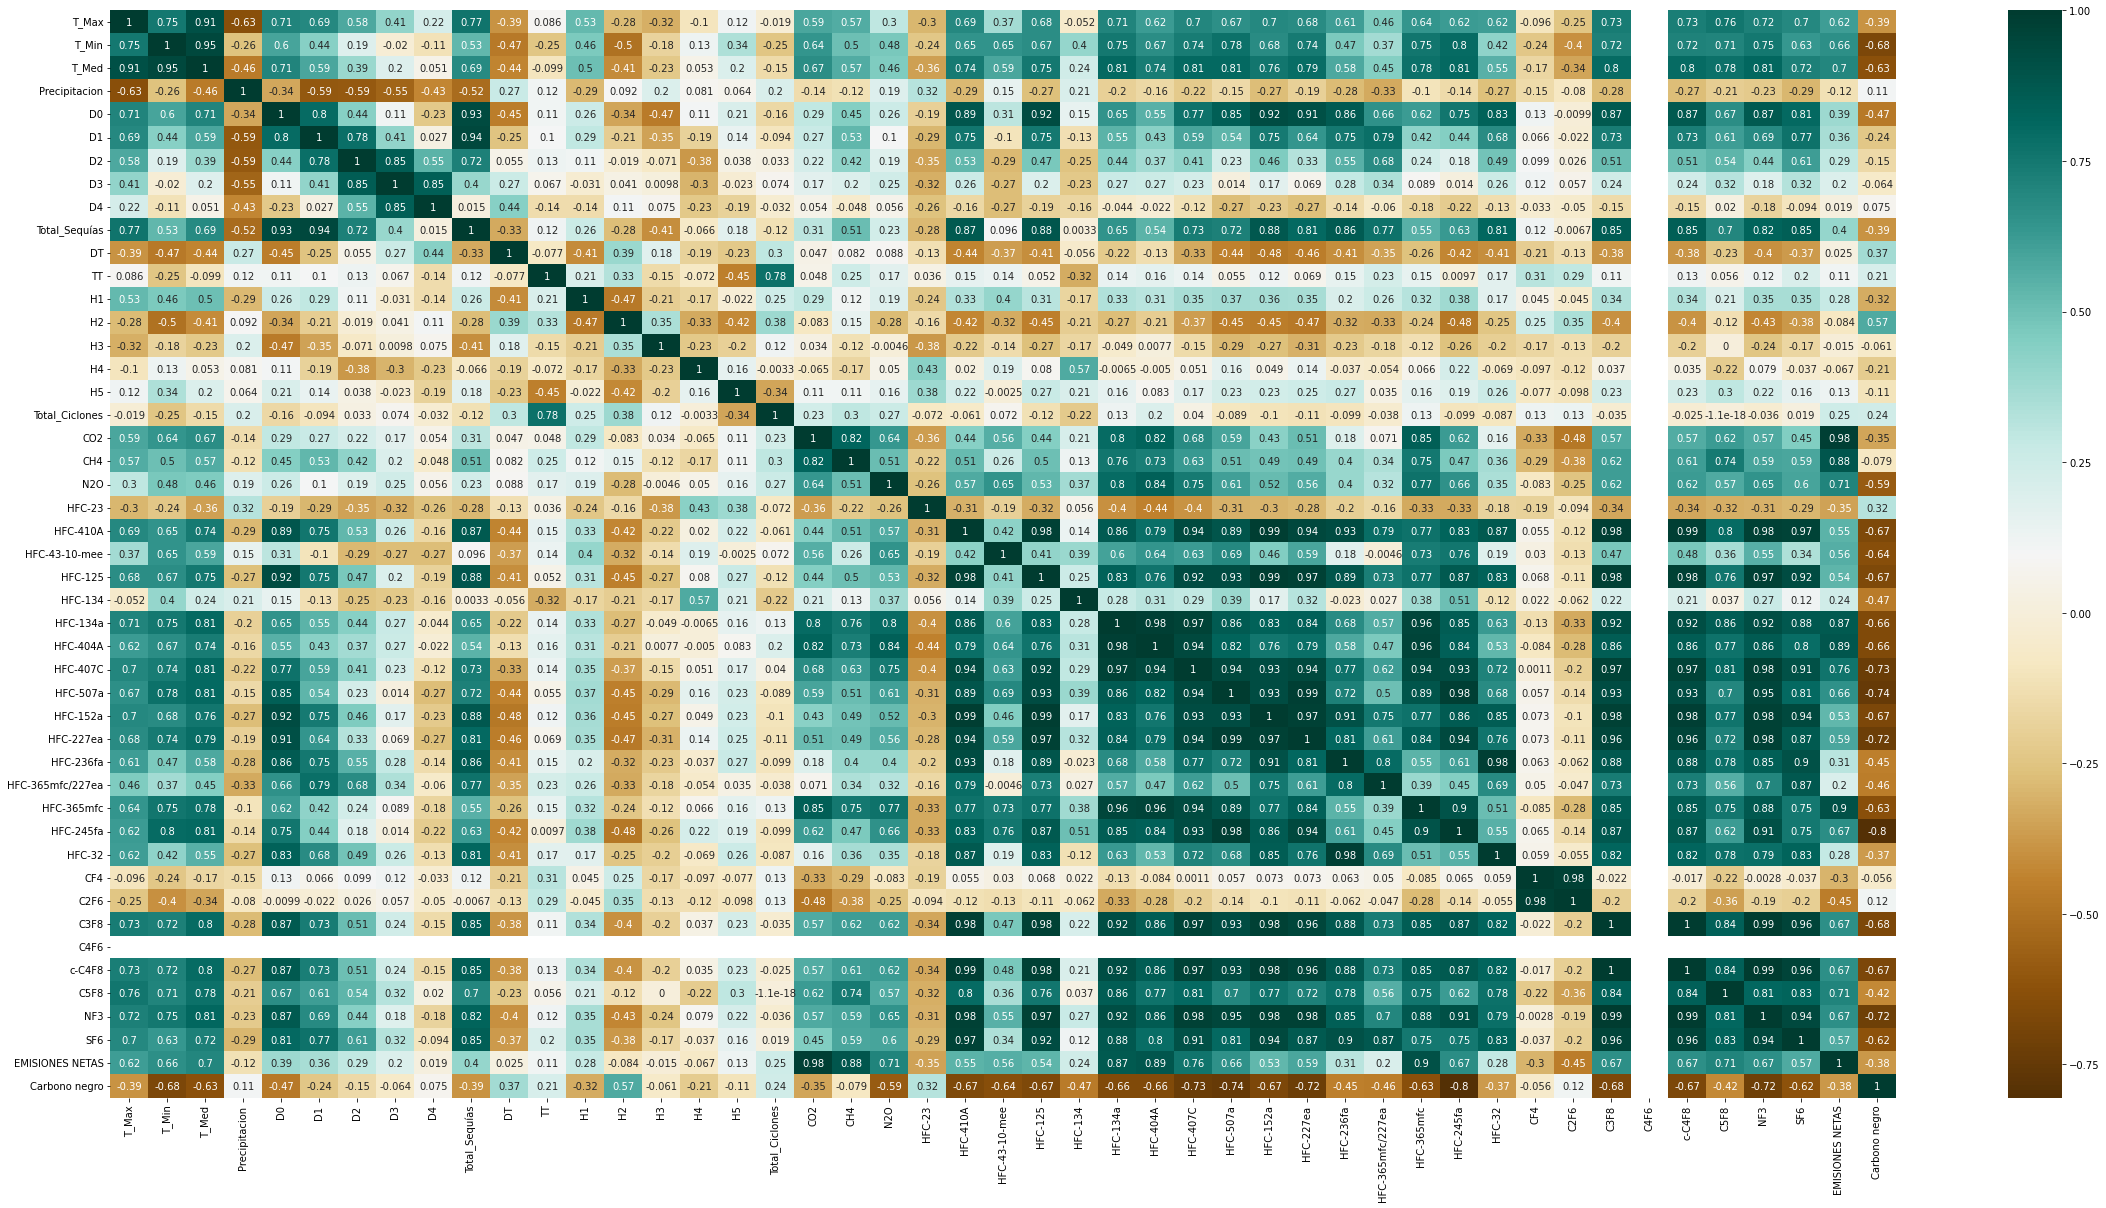

In [ ]:
plt.figure(figsize=(40, 20))
c= df_completo.corr()
#print(c)
sns.heatmap(c,cmap="BrBG",annot=True)

In [ ]:
print (c[c>=0.5])
c2 = c[c>=0.5]

                     T_Max     T_Min  ...  EMISIONES NETAS  Carbono negro
T_Max             1.000000  0.748379  ...         0.616174            NaN
T_Min             0.748379  1.000000  ...         0.661596            NaN
T_Med             0.909184  0.945073  ...         0.699770            NaN
Precipitacion          NaN       NaN  ...              NaN            NaN
D0                0.705765  0.597756  ...              NaN            NaN
D1                0.691870       NaN  ...              NaN            NaN
D2                0.582143       NaN  ...              NaN            NaN
D3                     NaN       NaN  ...              NaN            NaN
D4                     NaN       NaN  ...              NaN            NaN
Total_Sequías     0.765163  0.530900  ...              NaN            NaN
DT                     NaN       NaN  ...              NaN            NaN
TT                     NaN       NaN  ...              NaN            NaN
H1                0.526051       NaN  

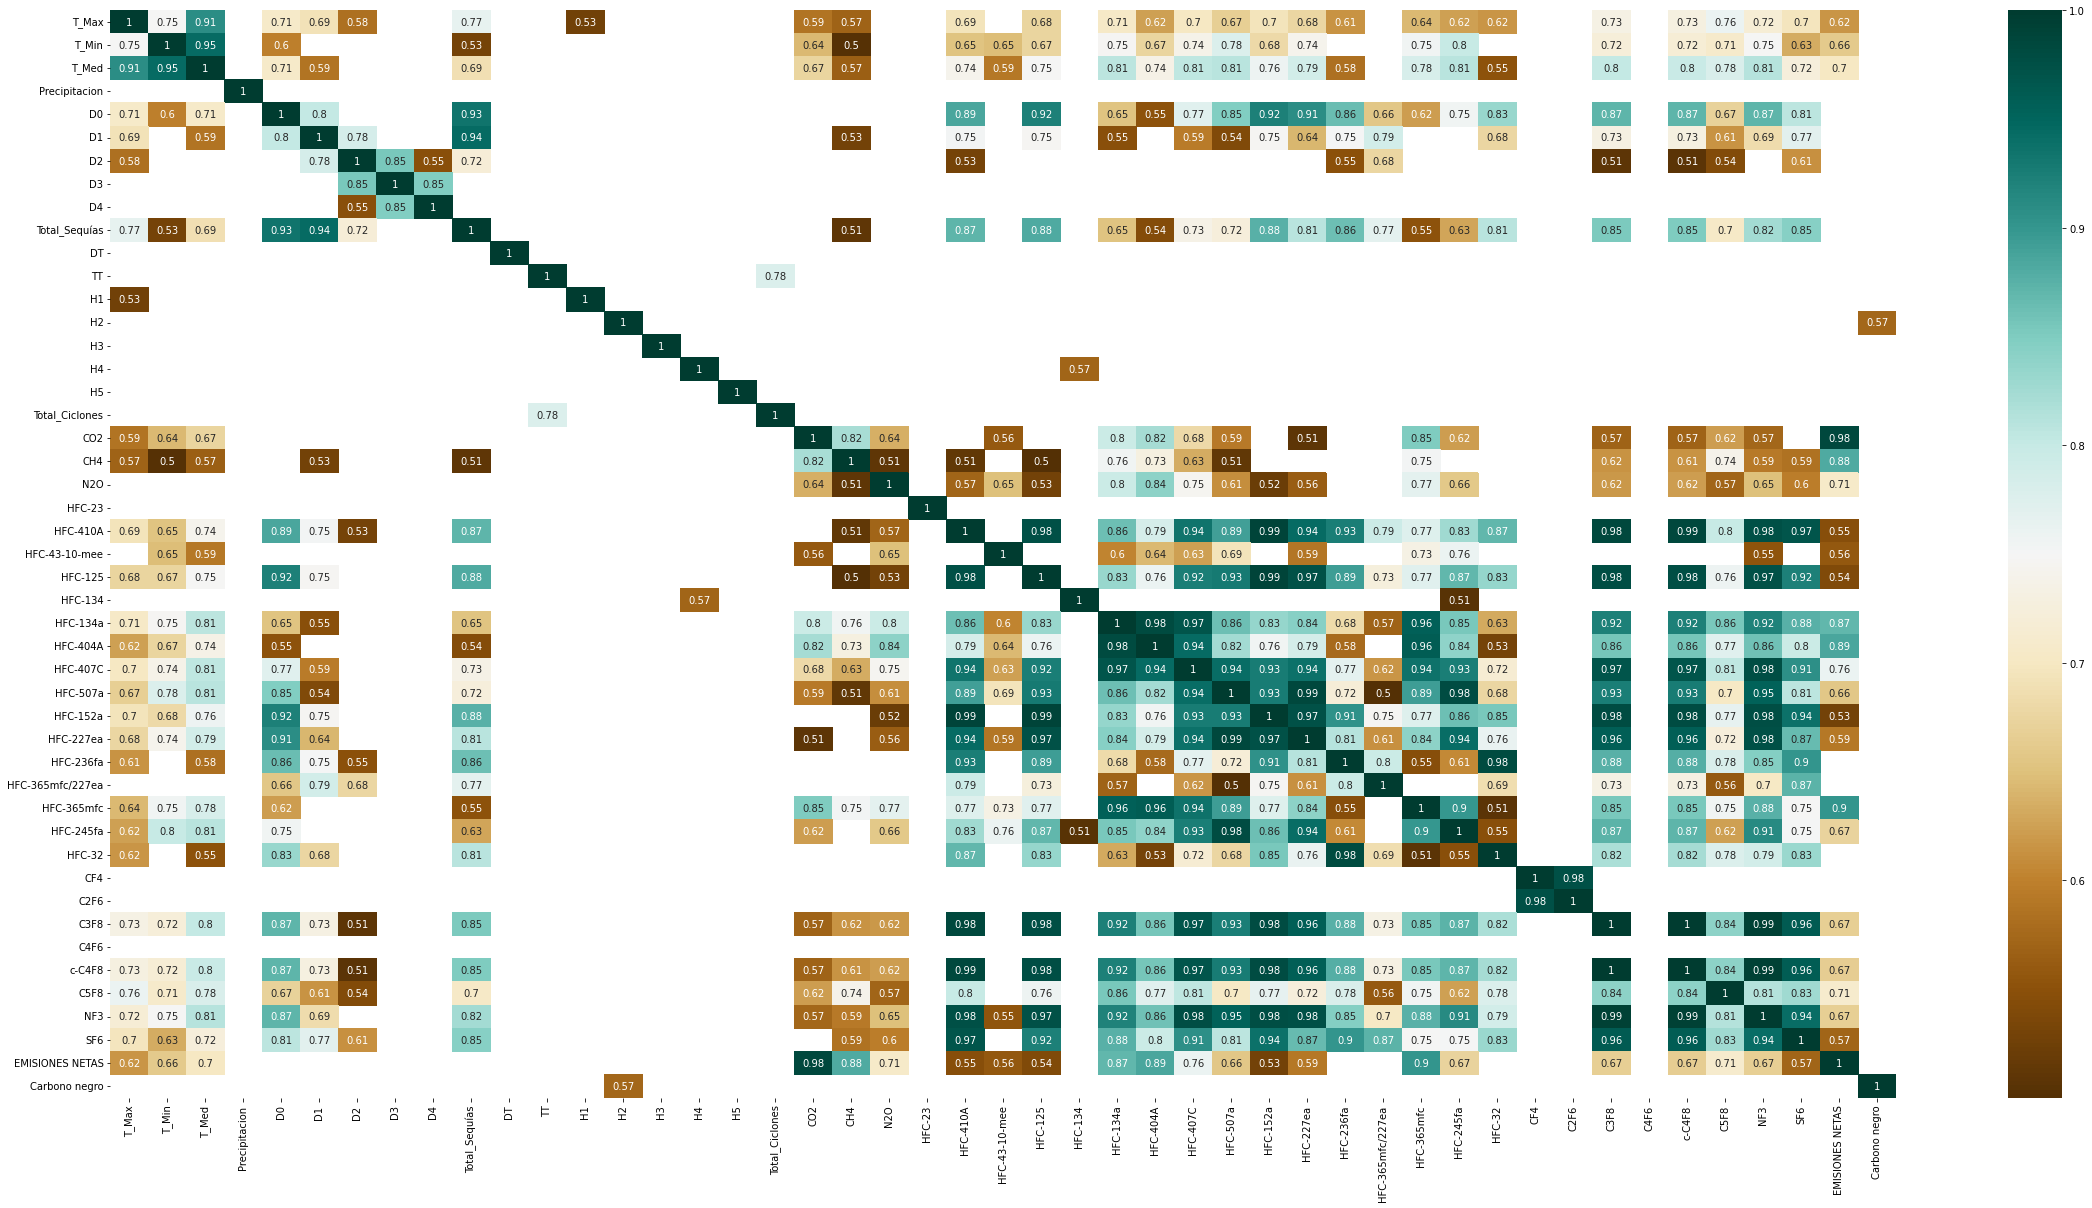

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(c2,cmap="BrBG",annot=True)

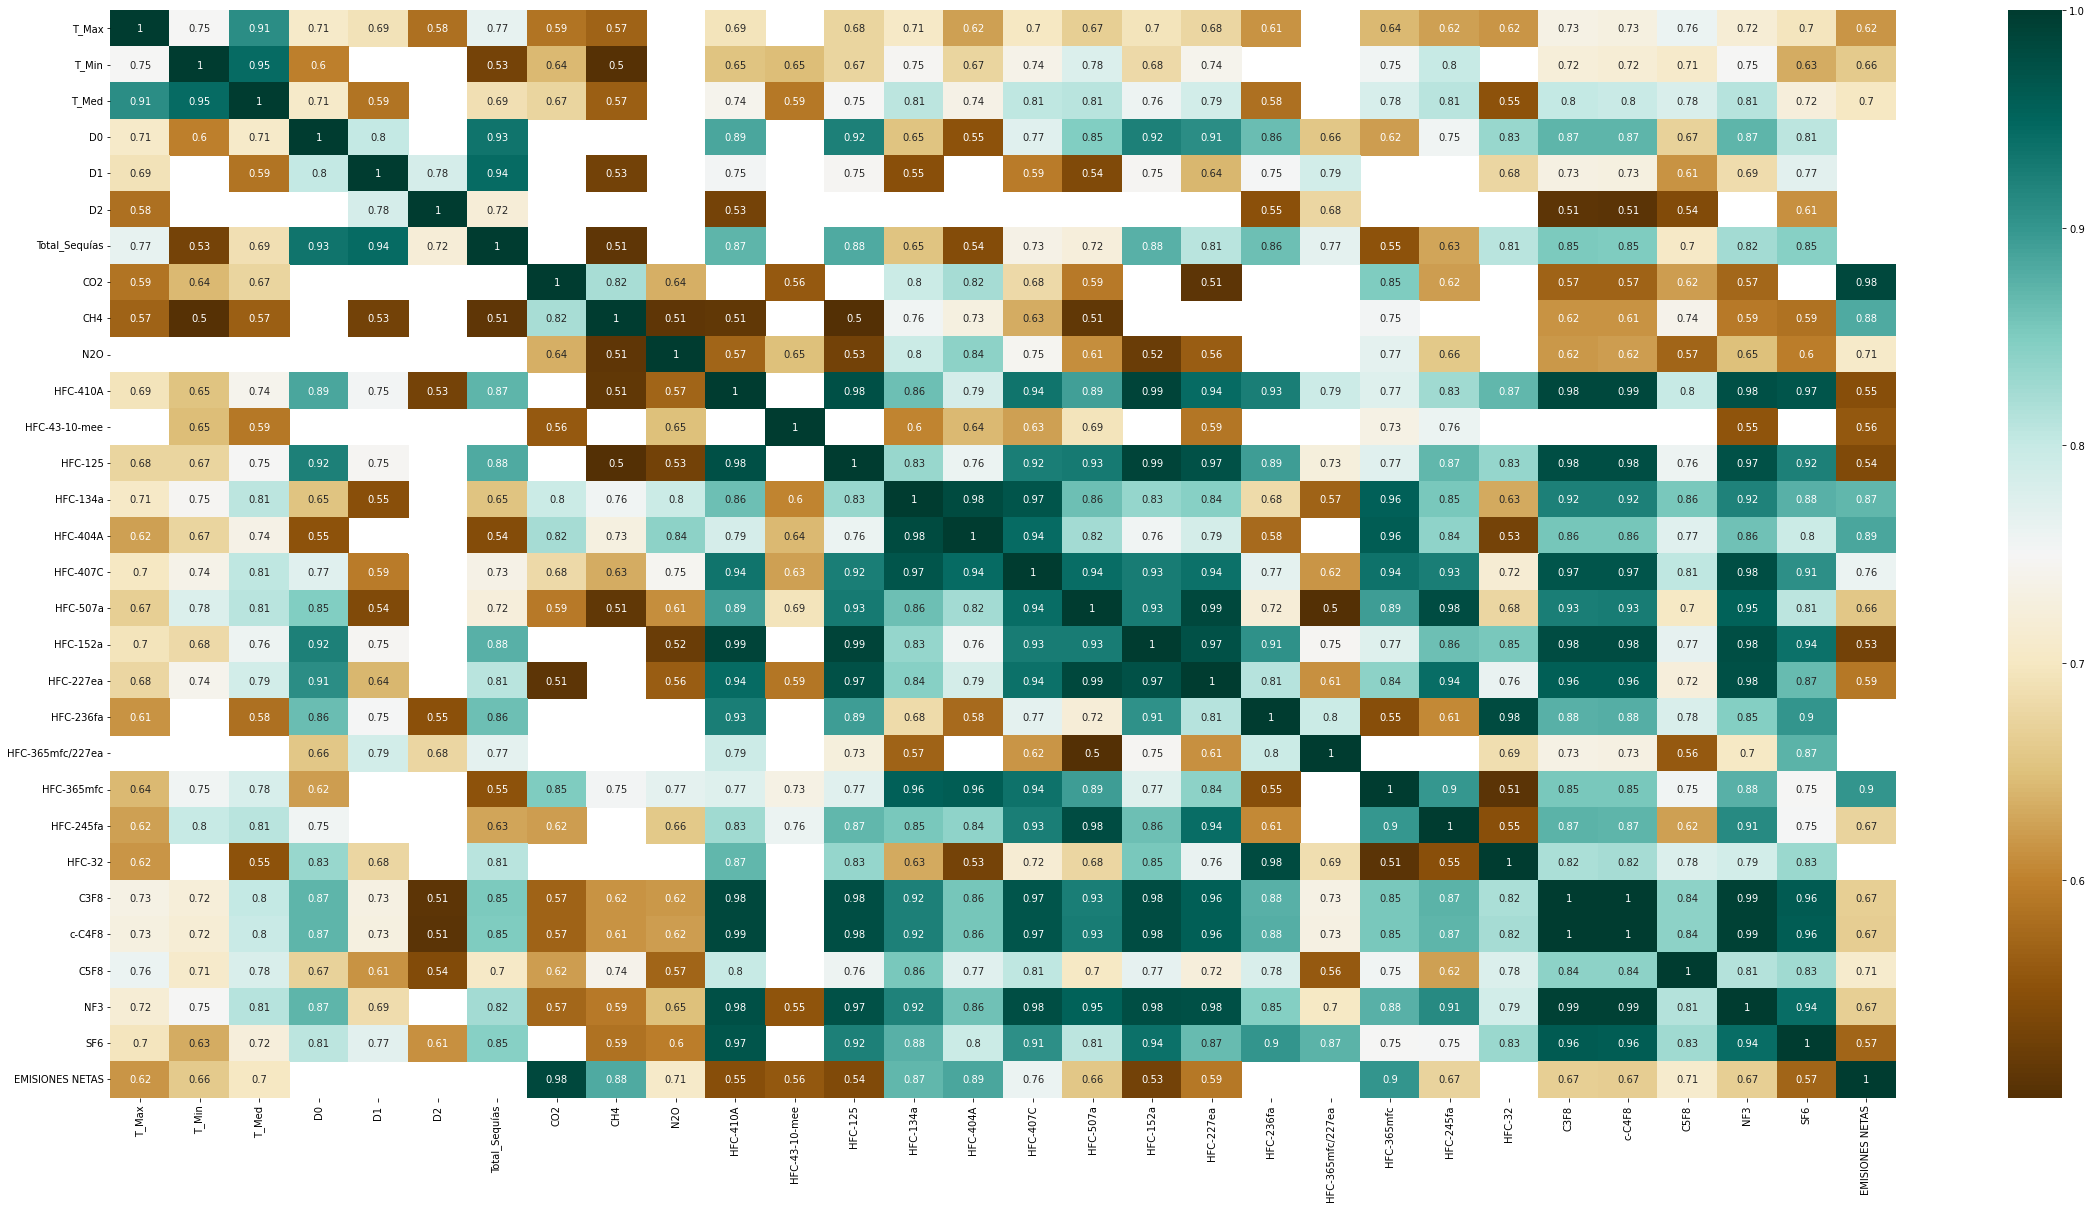

In [ ]:
c3 = c2

c3 = c3.dropna(thresh=4) 
c3 = c3.T
c3 = c3.dropna(thresh=4)

c3 = c3.T

plt.figure(figsize=(40, 20))
sns.heatmap(c3,cmap="BrBG",annot=True)

                    CH4  HFC-410A   HFC-125  ...      C5F8       NF3       SF6
T_Max          0.568917  0.693733  0.675507  ...  0.760175  0.718365  0.695704
T_Min          0.502939  0.652586  0.674924  ...  0.708858  0.749481  0.634236
T_Med          0.566203  0.741762  0.748117  ...  0.779591  0.812485  0.724301
D0                  NaN  0.885508  0.923232  ...  0.671161  0.871395  0.807870
D1             0.527933  0.753778  0.747441  ...  0.613638  0.685286  0.770020
Total_Sequías  0.510563  0.871664  0.881197  ...  0.703310  0.824399  0.845349

[6 rows x 19 columns]


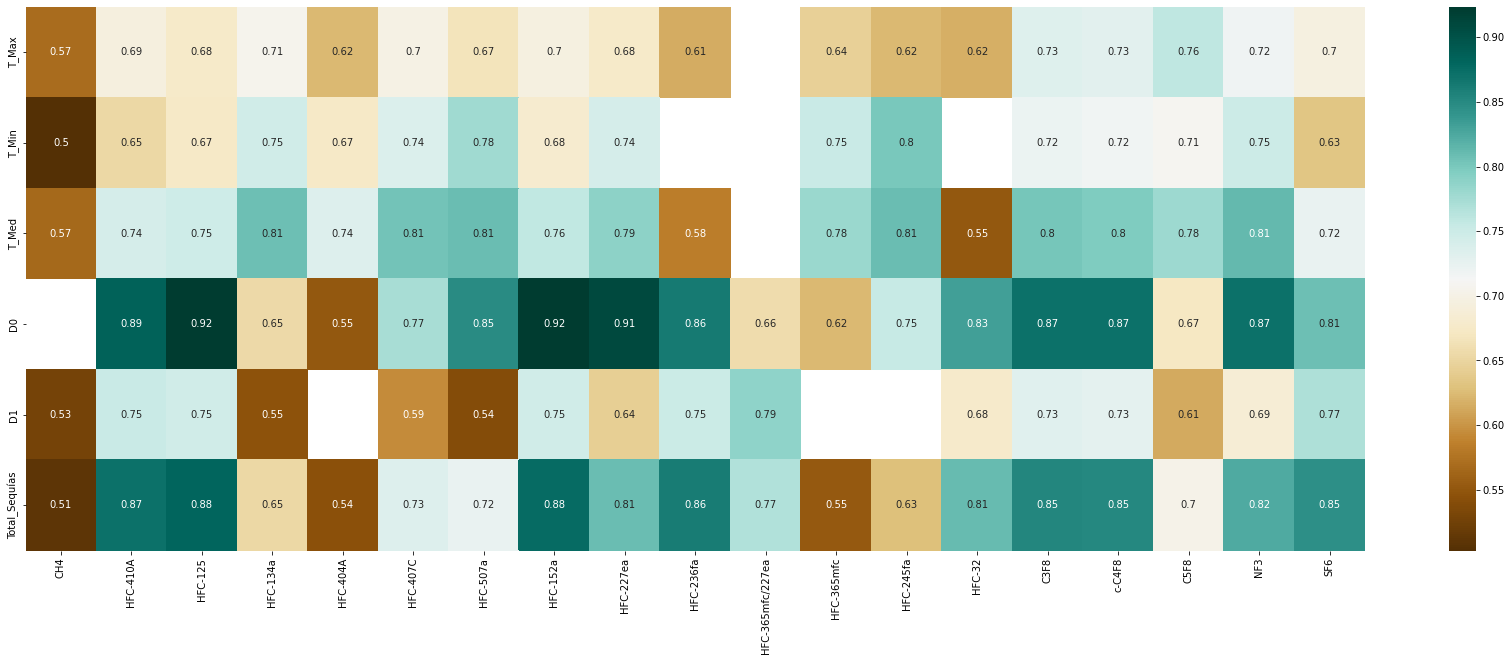

In [ ]:
c4 = c3

c4 = c4[c4.columns[0:7]]
c4 = c4.dropna(thresh=4) 
c4 = c4.T
c4 = c4[c4.columns[7:]]
c4 = c4.dropna(thresh=12)
print(c4)


plt.figure(figsize=(30, 10))
sns.heatmap(c4,cmap="BrBG",annot=True)
#c2 = c2.iloc[np.r_[0:7, 25:28]]